### Problem 1 
 
In  this  part  of  the  assignment,  you  will  work  with  file  I/O  operations, 
dictionaries, Numpy arrays and visualization with Matplotlib. You will write a 
simple Python script that will read a file named test.txt. You can hard 
code  this  into  your  program  for  convenience.  A  sample  file  is  given  on 
Canvas for your reference. Your program should read a text file and print a 
histogram of the letters present in the document. The code must have the 
histogram as both a dictionary, where the keys are letters and the values are 
the corresponding frequencies, as well as a Numpy array, where each index 
corresponds  to  a  letter  in  alphabetical  order.  For  example,  the  letter  ‘a’ 
corresponds to index 0, ‘b’ to index 1, etc.  
 
An example of a histogram for a line is given below:  
  
Input: The quick brown fox jumps over the lazy dog  
Output: {'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 3, 'f': 1, 
'g': 1, 'h': 2,  
'i': 1, 'j': 1, 'k': 1, 'l': 1, 'm': 1, 'n': 1, 'o': 4, 
'p': 1, 'q': 1, 'r':  
2, 's': 1, 't': 2, 'u': 2, 'v': 1, 'w': 1, 'x': 1, 'y': 
1, 'z': 1} 
 
Given  the  computed  histogram,  create  two  bar  graphs.  In  the  first,  the 
frequencies should be normalized i.e., the frequencies will sum to 1. In the 
second,  they  should  be  unnormalized.  Make  sure  to  generate  titles 
appropriately for the graph and the axes. Display the plots to the user along 
with printing the histogram(s). 

In [4]:
# Program to get letter count in a text file

# explicit function to return the letter count
def letterFrequency(fileName, letter):
    # open file in read mode
    file = open(fileName, 'r')
    cap = letter.upper()
    small = letter.lower()
    # store content of the file in a variable
    text = file.read()

    # using count()
    return text.count(cap) + text.count(small)

# call the function and display the letter count
# print(letterFrequency('test.txt', 'G'))

In [5]:
import string
import numpy as np
alphabet = np.array(list(string.ascii_lowercase))

dic = {}
for letter in alphabet:
    dic[letter] = letterFrequency('/test.txt', letter)

# dictionary of letters and corrresponding frequencies
print('Dictionary:\n',dic)
# nparray of letters
print('nparray of letters:\n',alphabet)

Dictionary:
 {'a': 44, 'b': 24, 'c': 23, 'd': 30, 'e': 63, 'f': 22, 'g': 23, 'h': 25, 'i': 56, 'j': 23, 'k': 22, 'l': 26, 'm': 22, 'n': 28, 'o': 50, 'p': 25, 'q': 22, 'r': 40, 's': 25, 't': 36, 'u': 38, 'v': 22, 'w': 22, 'x': 22, 'y': 27, 'z': 23}
nparray of letters:
 ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [6]:
total = sum(dic.values())
total_inverse = float(1/total)
#list of dictionay values that are the frequencies
freq = list(dic.values())
# normalized frequencies
norm_freq = list((i * total_inverse for i in freq))

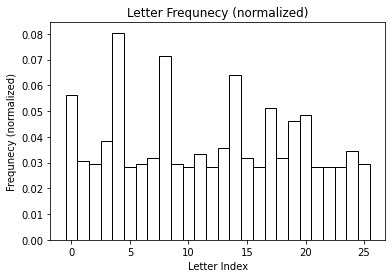

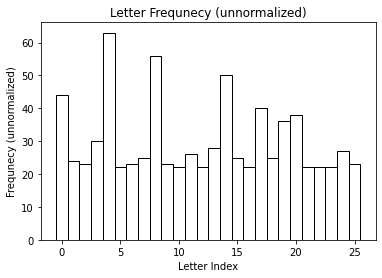

In [7]:
import matplotlib.pyplot as plt

plt.bar(list(np.arange(26)), norm_freq, width=1, fill = False, color='b')
plt.title("Letter Frequnecy (normalized)")
plt.ylabel("Frequnecy (normalized)")
plt.xlabel("Letter Index")
plt.show()

plt.bar(list(np.arange(26)), freq, width=1, fill = False, color = 'b')
plt.title("Letter Frequnecy (unnormalized)")
plt.ylabel("Frequnecy (unnormalized)")
plt.xlabel("Letter Index")
plt.show()

### Problem 2 
 
In this part of the assignment, you will be working with arrays using NumPy. 
You will be working with an image (test.png) that was provided on Canvas 
for convenience. You can read the image using OpenCV (installed by default 
on Colab) as follows. 
 
import cv2   
img = cv2.imread(‘input.png’)   
 
Perform the following operations: 
1.  For  each  pixel  in  the  image,  i.e.,  every  element  in  the  array  img, 
compute the Euclidean distance to the following points [255, 0, 0], [0, 
255, 0] and [0, 0, 255]. Once computed, set the value of the pixel to 
the point with the least distance. Save the image as output1.png  
2.  Set the pixels that fall within a square (whose sides are of length 50) 
at  the  center  of  the  image  to  be  [0,0,0].  Save  the  image  as 
output2.png.

(128, 128, 3)


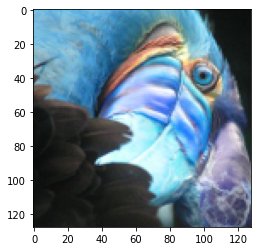

In [9]:
import cv2
img = cv2.imread('/test.png')
newimg = img.copy()

print(img.shape)
height, width, channels = img.shape

plt.imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##### (1)

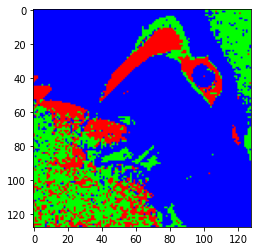

In [10]:
def least_pixel(pixel):
    R = [255, 0, 0]
    G = [0, 255, 0]
    B = [0, 0, 255]
    r = np.linalg.norm(pixel-R)
    g = np.linalg.norm(pixel-G)
    b = np.linalg.norm(pixel-B)
    minm = min(r,g,b)
    if r==minm:
        return R
    elif g==minm:
        return G
    else:
        return B

for x in range(0,width):
    for y in range(0,height):
        true_pixel = img[x,y]
        newimg[x,y] = least_pixel(true_pixel)
        
cv2.imwrite('output1.jpg', newimg)
plt.imshow(newimg)

##### (2)

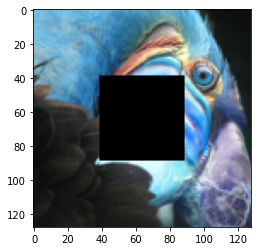

In [11]:
# midpoint of the image
midx = int(width/2)
midy = int(height/2)
newimg2 = img.copy()
# specifying pixel on 50x50 square centered at the midpoint
for x in range(midx-25,midx+25,1):
    for y in range(midy-25,midy+25):
        newimg2[x,y] = [0,0,0]

cv2.imwrite('output2.jpg', newimg2)
plt.imshow(newimg2)

### Problem 3 
 
In this part of the assignment, you will be using NumPy to solve the following 
word problem. Specifically, you can use the LinAlg package from Numpy to 
solve the system of equations. 
 
Problem statement:  
You and a friend go to buy tacos. You get three soft tacos 
and  three  burritos  and  your  total  bill  is  '11.25'.  Your 
friend's  bill  is  "10.00"  for  four  soft  tacos  and  two 
burritos. How much do soft tacos cost? How much do burritos 
cost? 
 
 

In [12]:
# Solving systems of equations
import numpy as np

# 3t+3b=11.25
# 4t+2b=10.00
# Columns of a are variable coefficients, rows are individual equations
a = np.array([[3,3],[4,2]])
# Column vector of equation equalities
b = np.array([[11.25],[10.00]])
# Check to ensure matrix is nonsingular
# print(np.linalg.det(a))

# Solve
soln = np.linalg.solve(a, b)
print('soft tacos cost',soln.item(0),'dollars each')
print('burritos cost',soln.item(1),'dollars each')

soft tacos cost 1.25 dollars each
burritos cost 2.5 dollars each
